In [1]:
#from typing import Dict, Tuple, List
#from pathlib import Path
#
#import numpy as np
#import pandas as pd

#from numpy.testing import assert_equal, assert_allclose
from typing import Dict, Tuple, List
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#does intensity affect time to sleep and time slept?

In [3]:
#pd.read_csv("data/babynames/names2000_2021.csv", index_col=0)
minuteCaloriesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteSleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyCalories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
weightLog = pd.read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# Factors affecting time to fall asleep and time slept?

Investigate whether the amount of calories burnt or active minutes affect the time required to fall asleep and time slept.
## i) Calories 

In [4]:
#does daily calories affect time required to fall asleep?
#function merging dailyCalories and sleepday datasets
def merge_dailyCal_sleepDay(dailyCalories: pd.DataFrame, sleepday: pd.DataFrame): 
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyCalories,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

In [5]:
merge_dailyCal_sleepDay(dailyCalories, sleepday)

/var/folders/b8/k1shsjk53yg7j39tjbpltkzc0000gn/T/ipykernel_16826/2691997458.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDay,Calories,TimeToFallAsleep
0,1503960366,2016-04-12,1,327,346,4/12/2016,4/12/2016,1985,19
1,1503960366,2016-04-13,2,384,407,4/13/2016,4/13/2016,1797,23
2,1503960366,2016-04-15,1,412,442,4/15/2016,4/15/2016,1745,30
3,1503960366,2016-04-16,2,340,367,4/16/2016,4/16/2016,1863,27
4,1503960366,2016-04-17,1,700,712,4/17/2016,4/17/2016,1728,12
...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,4/30/2016,4/30/2016,2896,17
409,8792009665,2016-05-01,1,503,527,5/1/2016,5/1/2016,1962,24
410,8792009665,2016-05-02,1,415,423,5/2/2016,5/2/2016,2015,8
411,8792009665,2016-05-03,1,516,545,5/3/2016,5/3/2016,2297,29


In [6]:
def visualize_data(df):
    # Line plot of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Bar chart of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Scatter plot and regression line
    plt.figure(figsize=(12, 6))
    sns.regplot(data=df, x='Calories', y='TimeToFallAsleep', scatter_kws={'alpha':0.5})
    plt.title('Regression Analysis: Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Regression analysis
    X = df['Calories'].values.reshape(-1, 1)
    y = df['TimeToFallAsleep'].values
    regression = LinearRegression()
    regression.fit(X, y)
    y_pred = regression.predict(X)
    
    print('Regression Coefficient:', regression.coef_)
    print('Intercept:', regression.intercept_)
    print('R^2 score:', regression.score(X, y))


In [157]:


def plot_box_calorie_intervals_avg_sleep(df: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    df['CalorieInterval'] = pd.cut(df['Calories'], bins=bins, labels=labels, right=False)
    
    # Create a box plot for the average time to fall asleep in each interval
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='CalorieInterval', y='TimeToFallAsleep')
    plt.title('Box Plot of Time to Fall Asleep in Different Calorie Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.show()


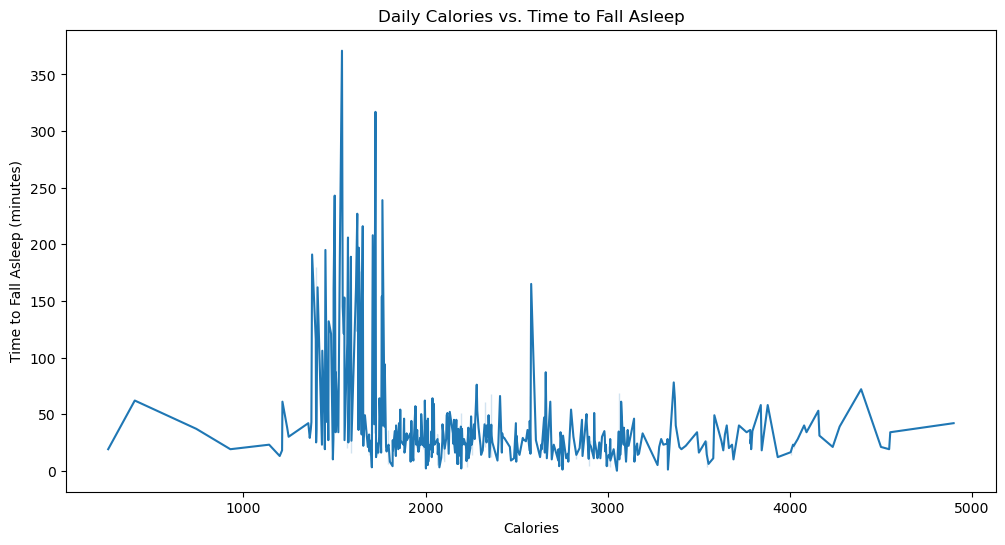

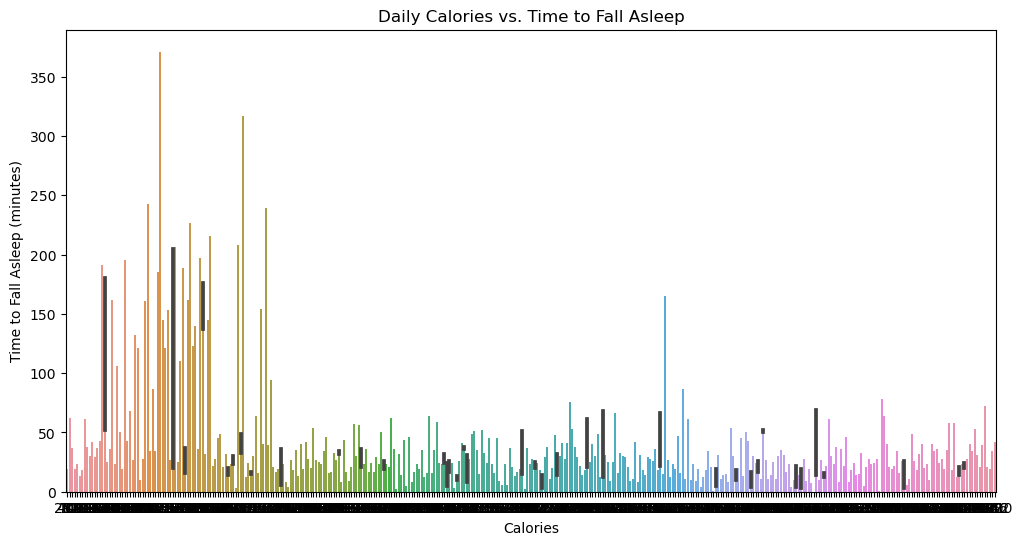

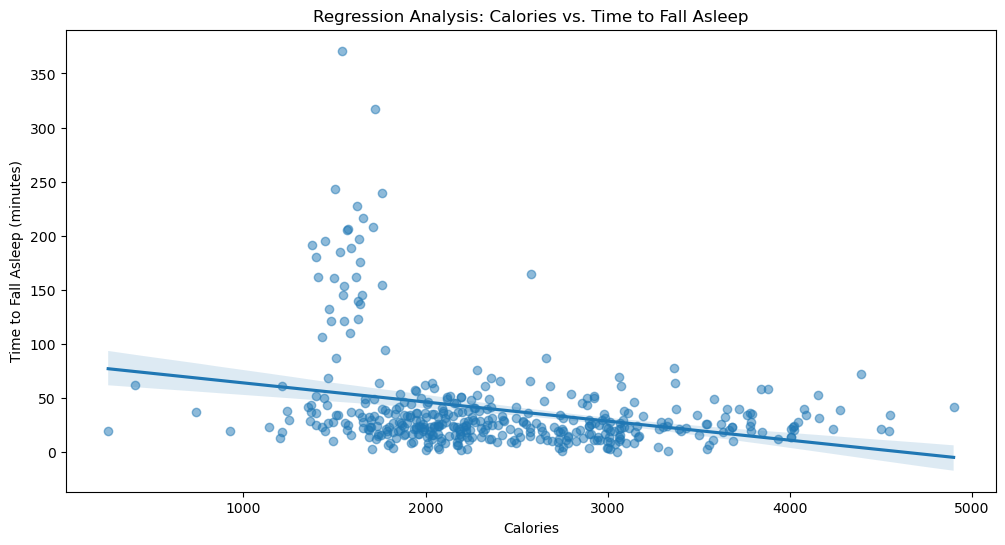

Regression Coefficient: [-0.01765138]
Intercept: 81.49240625201736
R^2 score: 0.08361089404548572


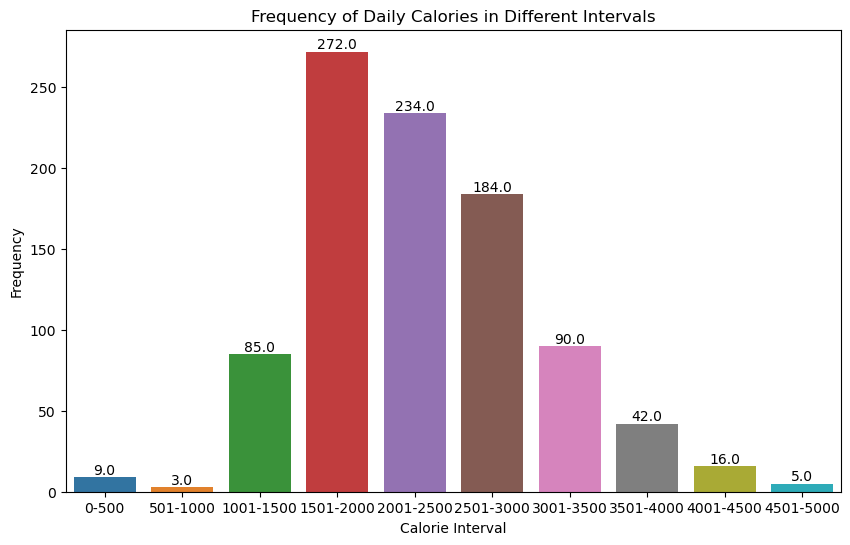

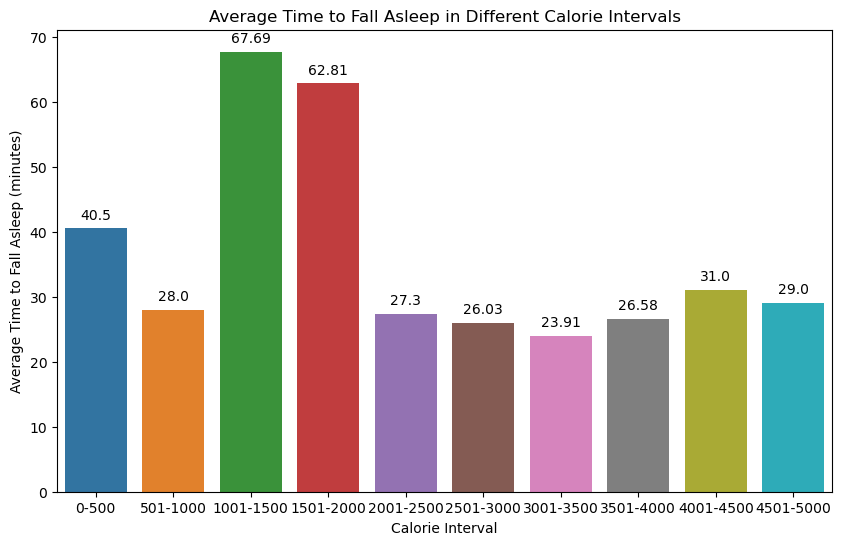

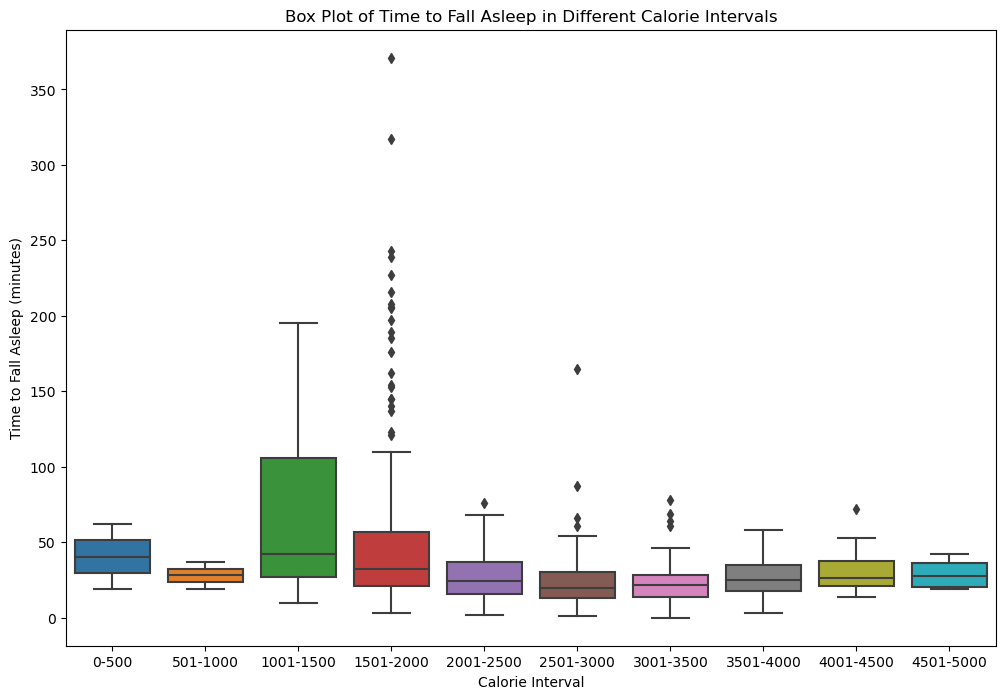

In [158]:
a = merge_dailyCal_sleepDay(dailyCalories, sleepday)
visualize_data(a)
plot_calorie_intervals_frequency(dailyCalories)
plot_calorie_intervals_avg_sleep(a)
plot_box_calorie_intervals_avg_sleep(a)


## 1 Does daily activity affect time required to fall asleep?
## 1.1) Anlysis dataset daily Activity 

Correlation for all the variables in the daily Activity table.

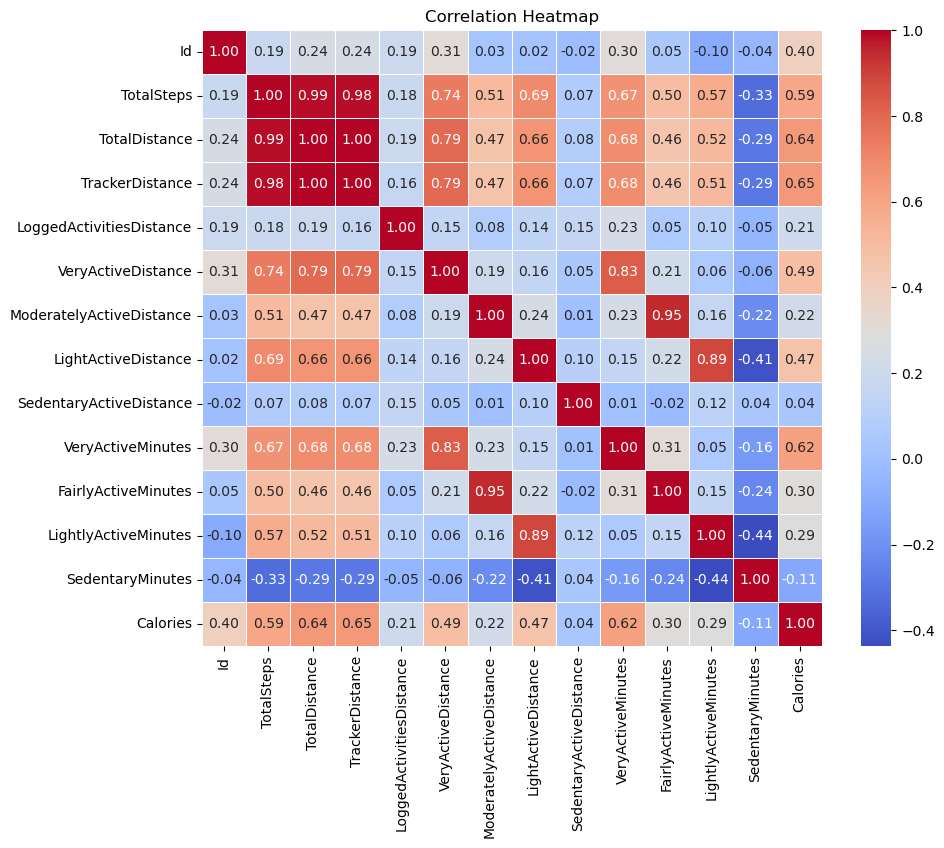

In [9]:
#correlation of the table daily Activities
def correlation(df):
    df_new = df.drop("ActivityDate",axis="columns")
    return df_new.corr()
    
def display_heatmap(df):
    corr_matrix = correlation(df)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
    plt.title('Correlation Heatmap')
    plt.show()
    
correlation(dailyActivity)
display_heatmap(dailyActivity)

In [10]:
#see how much do people proportion of high intensity do people usually do
#see if it is correlated to distance
#observe if relationship with bmi
#count for how many different people do we have bmi info and weight
#compare 



In [11]:
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [12]:
dailyActivity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [13]:
dailyActivity.shape


(940, 15)

In [14]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [15]:
dailyActivity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [16]:
#add day of week 
#N_Day_of_Week 0= Monday, 6= Sunday
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"], format= '%m/%d/%Y')

day_of_week = dailyActivity["ActivityDate"].dt.day_name()
dailyActivity["Day_of_Week"] = day_of_week

dailyActivity["N_Day_of_Week"] = dailyActivity["ActivityDate"].dt.weekday
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_Week,N_Day_of_Week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,5


In [17]:
dailyActivity.duplicated().sum()

0

In [18]:
dailyActivity['Id'].value_counts()

Id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

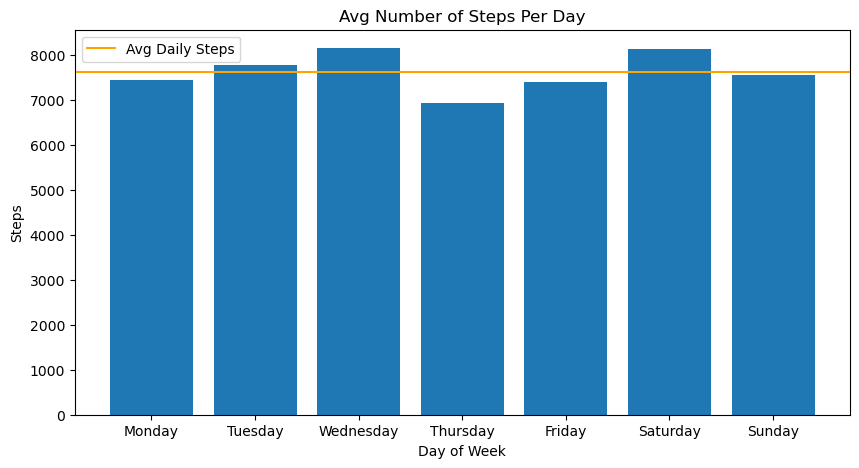

In [19]:
#https://www.kaggle.com/code/victoriamcmath/fitness-tracker-case-study
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=dailyActivity.groupby(['Day_of_Week'])
avg_daily_steps = day_grp['TotalSteps'].mean()
avg_steps = dailyActivity['TotalSteps'].mean()

plt.bar(avg_daily_steps.index, avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_steps.mean(), color= 'orange', label='Avg Daily Steps')
ax.set_ylabel('Steps')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Number of Steps Per Day')

plt.legend()
plt.show()


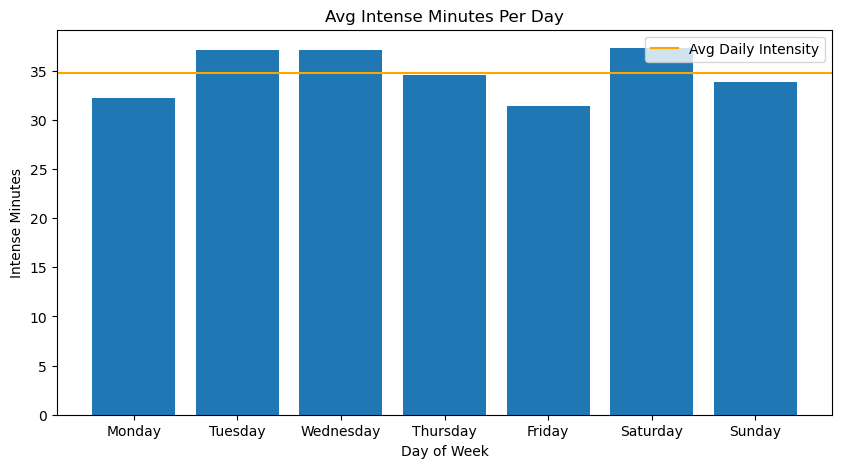

In [20]:
dailyActivity["IntenseMinutes"]=dailyActivity["VeryActiveMinutes"]+dailyActivity["FairlyActiveMinutes"]

ig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=dailyActivity.groupby(['Day_of_Week'])
avg_daily_intense_mins = day_grp['IntenseMinutes'].mean()
avg_intense_minutes = dailyActivity['IntenseMinutes'].mean()

plt.bar(avg_daily_intense_mins.index, avg_daily_intense_mins)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_intense_mins.mean(), color= 'orange', label='Avg Daily Intensity')
ax.set_ylabel('Intense Minutes')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Intense Minutes Per Day')

plt.legend()
plt.show()

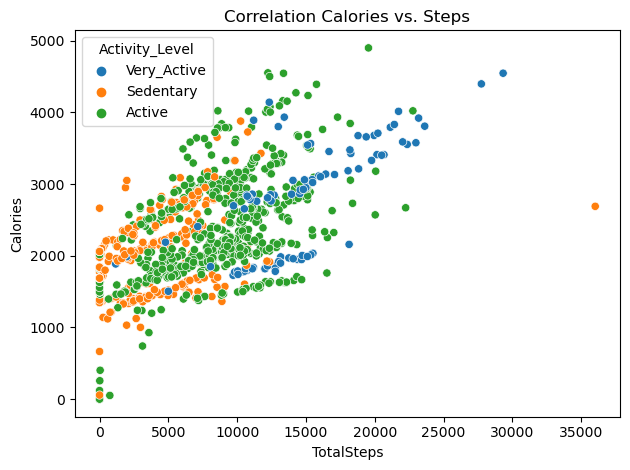

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_Week,N_Day_of_Week,IntenseMinutes,Activity_Level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1,38,Very_Active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2,40,Very_Active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,3,41,Very_Active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,4,63,Very_Active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,5,46,Very_Active


In [21]:
#https://www.kaggle.com/code/victoriamcmath/fitness-tracker-case-study
id_grp = dailyActivity.groupby(['Id'])
id_avg_step = id_grp['TotalSteps'].mean().sort_values(ascending=False)

id_avg_step = id_avg_step.to_frame()
conditions = [(id_avg_step <=6000), (id_avg_step > 6000) & (id_avg_step < 12000), (id_avg_step >=12000)]
values = ['Sedentary', 'Active', 'Very_Active']
id_avg_step['Activity_Level'] = np.select(conditions, values)
id_activity_level = id_avg_step['Activity_Level']
dailyActivity['Activity_Level'] = [id_activity_level[c] for c in dailyActivity['Id']]

ax = sns.scatterplot(x="TotalSteps", y= "Calories", data=dailyActivity, hue=dailyActivity['Activity_Level'])
plt.title('Correlation Calories vs. Steps')

plt.tight_layout()
plt.show()
dailyActivity.head()

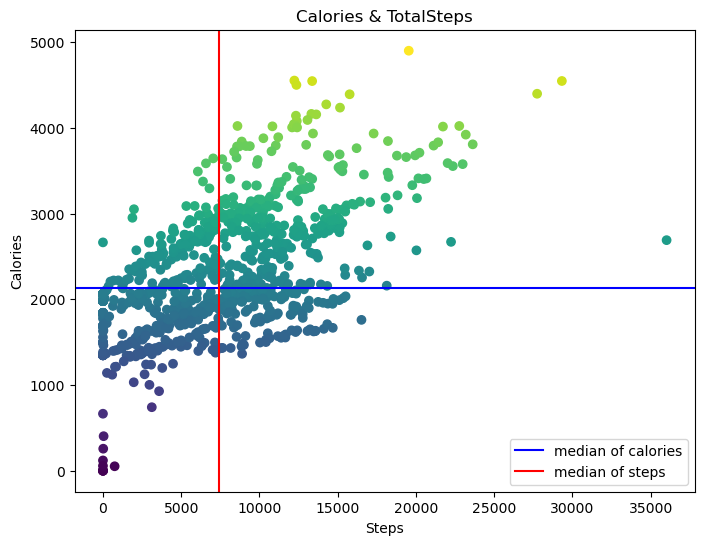

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(dailyActivity['TotalSteps'] ,dailyActivity['Calories'], c=dailyActivity['Calories'])

median_steps = 7405
median_calories = 2134

plt.axhline(median_calories, color = 'b', label = 'median of calories')
plt.axvline(median_steps, color = 'r', label = 'median of steps')

plt.xlabel('Steps')
plt.ylabel('Calories')
plt.title('Calories & TotalSteps')

plt.legend()
plt.show()

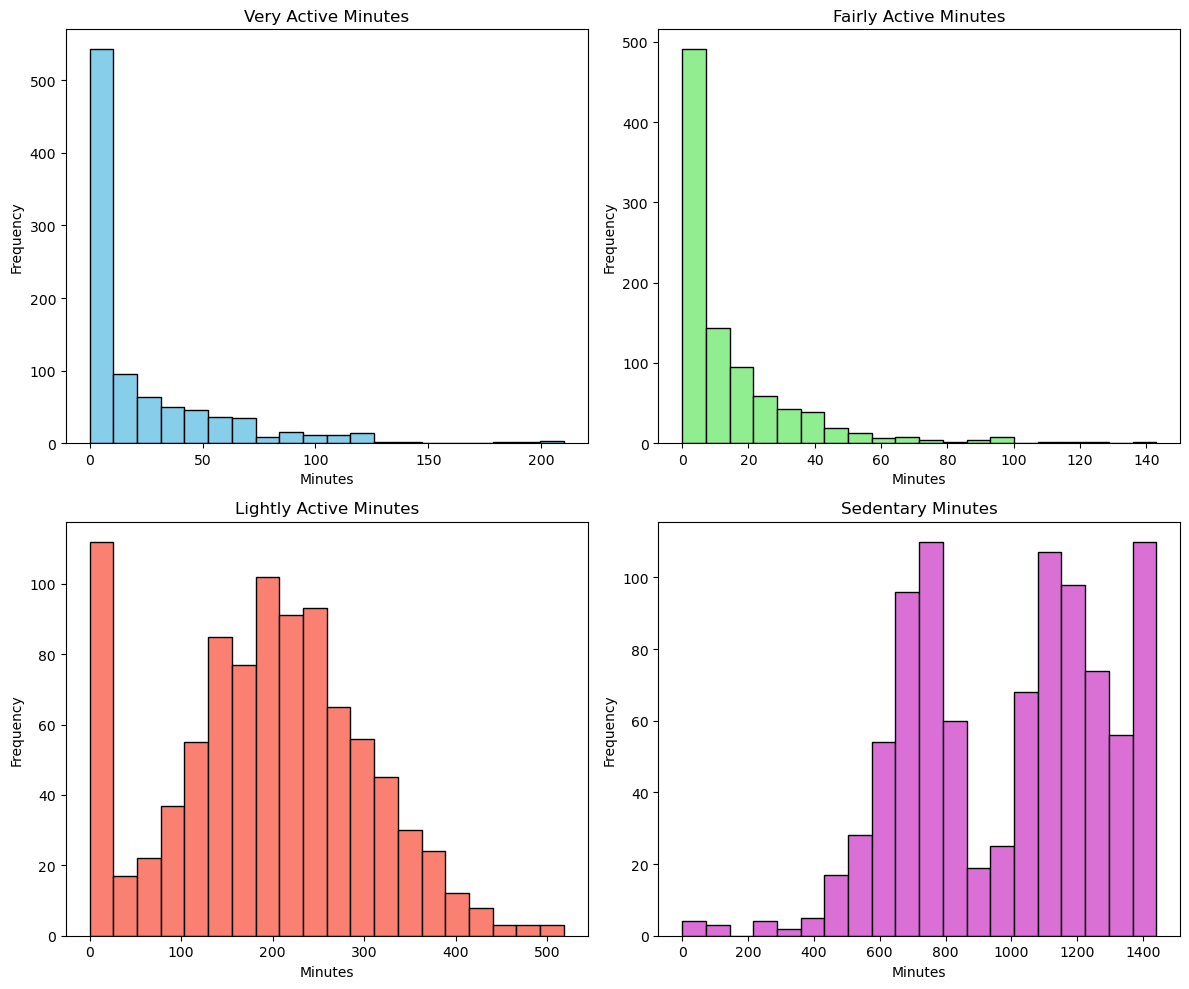

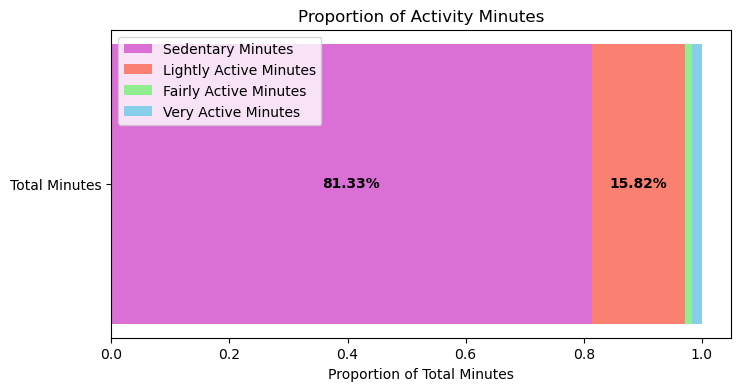

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

dailyActivity['VeryActiveMinutes'].plot.hist(ax=axes[0, 0], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Very Active Minutes')
axes[0, 0].set_xlabel('Minutes')
axes[0, 0].set_ylabel('Frequency')

dailyActivity['FairlyActiveMinutes'].plot.hist(ax=axes[0, 1], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Fairly Active Minutes')
axes[0, 1].set_xlabel('Minutes')
axes[0, 1].set_ylabel('Frequency')

dailyActivity['LightlyActiveMinutes'].plot.hist(ax=axes[1, 0], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Lightly Active Minutes')
axes[1, 0].set_xlabel('Minutes')
axes[1, 0].set_ylabel('Frequency')

dailyActivity['SedentaryMinutes'].plot.hist(ax=axes[1, 1], bins=20, color='orchid', edgecolor='black')
axes[1, 1].set_title('Sedentary Minutes')
axes[1, 1].set_xlabel('Minutes')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#show common proportion of how much time of intensity people dedicate to each category
def single_stack_graph_minutes(dailyActivities):
    sumSedentary=dailyActivities["SedentaryMinutes"].sum()
    sumLightly=dailyActivities["LightlyActiveMinutes"].sum()
    sumFairly=dailyActivities["FairlyActiveMinutes"].sum()
    sumVery=dailyActivities["VeryActiveMinutes"].sum()
    
    total = sumSedentary + sumLightly + sumFairly + sumVery
    proportions = [sumSedentary / total, sumLightly / total, sumFairly / total, sumVery / total]
    labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
    colors = ['orchid', 'salmon', 'lightgreen', 'skyblue']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(['Total Minutes'], [proportions[0]], color=colors[0], label=labels[0])
    bars1 = ax.barh(['Total Minutes'], [proportions[1]], left=[proportions[0]], color=colors[1], label=labels[1])
    bars2 = ax.barh(['Total Minutes'], [proportions[2]], left=[proportions[0] + proportions[1]], color=colors[2], label=labels[2])
    bars3 = ax.barh(['Total Minutes'], [proportions[3]], left=[proportions[0] + proportions[1] + proportions[2]], color=colors[3], label=labels[3])

    # Adding labels
    for bars in [bars, bars1]:
        for bar in bars:
            width = bar.get_width()
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.2%}', ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Proportion of Total Minutes')
    plt.title('Proportion of Activity Minutes')
    plt.legend()
    plt.show()

# Assuming df is the DataFrame loaded from the CSV file
single_stack_graph_minutes(dailyActivity)

    

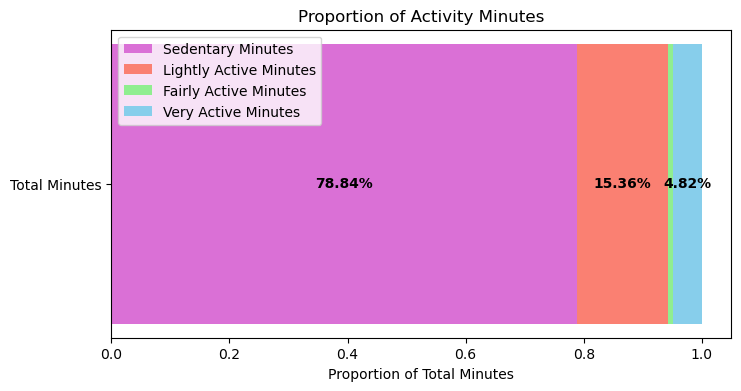

In [24]:
def single_stack_graph_minutes_veryActive(dailyActivities):
    very_active_group = dailyActivities[dailyActivities["Activity_Level"] == "Very_Active"]
    sumSedentary=very_active_group["SedentaryMinutes"].sum()
    sumLightly=very_active_group["LightlyActiveMinutes"].sum()
    sumFairly=very_active_group["FairlyActiveMinutes"].sum()
    sumVery=very_active_group["VeryActiveMinutes"].sum()
    
    total = sumSedentary + sumLightly + sumFairly + sumVery
    proportions = [sumSedentary / total, sumLightly / total, sumFairly / total, sumVery / total]
    labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
    colors = ['orchid', 'salmon', 'lightgreen', 'skyblue']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(['Total Minutes'], [proportions[0]], color=colors[0], label=labels[0])
    bars1 = ax.barh(['Total Minutes'], [proportions[1]], left=[proportions[0]], color=colors[1], label=labels[1])
    bars2 = ax.barh(['Total Minutes'], [proportions[2]], left=[proportions[0] + proportions[1]], color=colors[2], label=labels[2])
    bars3 = ax.barh(['Total Minutes'], [proportions[3]], left=[proportions[0] + proportions[1] + proportions[2]], color=colors[3], label=labels[3])

    # Adding labels
    for bars in [bars, bars1,bars3]:
        for bar in bars:
            width = bar.get_width()
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.2%}', ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Proportion of Total Minutes')
    plt.title('Proportion of Activity Minutes')
    plt.legend()
    plt.show()
    
single_stack_graph_minutes_veryActive(dailyActivity)

In [25]:
#https://saturncloud.io/blog/how-to-select-row-with-max-value-in-column-from-pandas-groupby-groups/#:~:text=Using%20groupby()%20and%20idxmax()&text=groupby()%20groups%20the%20data,Score'%20column%20for%20each%20group.&text=Here%2C%20idx%20is%20a%20Pandas,maximum%20value%20for%20each%20group.
def maximum_steps_per_Id(df: pd.DataFrame):
    idx = df.groupby("Id")["TotalSteps"].idxmax()
    max_scores = df.loc[idx, ["Id", "TotalSteps"]]
    return max_scores.head()

def average_steps_per_Id(df: pd.DataFrame):
    group = df.groupby("Id")
    avg_scores = group["TotalSteps"].mean()
    return avg_scores.head()



In [26]:
maximum_steps_per_Id(dailyActivity)

,Id,TotalSteps
15,1503960366,18134
50,1624580081,36019
80,1644430081,18213
101,1844505072,8054
143,1927972279,3790


In [27]:
average_steps_per_Id(dailyActivity)

Id
1503960366    12116.741935
1624580081     5743.903226
1644430081     7282.966667
1844505072     2580.064516
1927972279      916.129032
Name: TotalSteps, dtype: float64

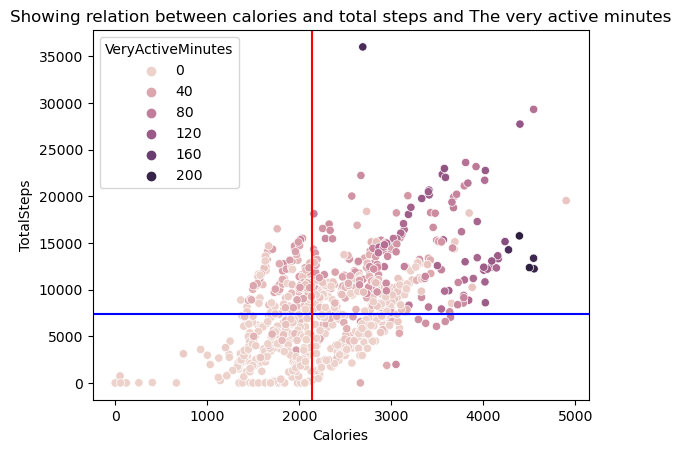

In [28]:
sns.scatterplot(x = "Calories",
                y= "TotalSteps",
                hue="VeryActiveMinutes",
                data = dailyActivity)
median_steps = 7405
median_calories = 2134

plt.axhline(median_steps, color = 'b', label = 'median of steps')
plt.axvline(median_calories, color = 'r', label = 'median of calories')

plt.title("Showing relation between calories and total steps and The very active minutes")
plt.show()

# Sleep Analysis

## i) Analysis sleep day 

In [38]:
print(sleepday.shape)

(413, 8)


In [39]:
sleepday.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
Day_of_Week           0
N_Day_of_Week         0
dtype: int64

In [40]:
sleepday.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
Day_of_Week           0
N_Day_of_Week         0
dtype: int64

In [44]:
sleepday.duplicated().sum()

3

In [45]:
sleepday.drop_duplicates()


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Day_of_Week,N_Day_of_Week
0,1503960366,2016-04-12,1,327,346,4/12/2016,Tuesday,1
1,1503960366,2016-04-13,2,384,407,4/13/2016,Wednesday,2
2,1503960366,2016-04-15,1,412,442,4/15/2016,Friday,4
3,1503960366,2016-04-16,2,340,367,4/16/2016,Saturday,5
4,1503960366,2016-04-17,1,700,712,4/17/2016,Sunday,6
...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,4/30/2016,Saturday,5
409,8792009665,2016-05-01,1,503,527,5/1/2016,Sunday,6
410,8792009665,2016-05-02,1,415,423,5/2/2016,Monday,0
411,8792009665,2016-05-03,1,516,545,5/3/2016,Tuesday,1


In [46]:
sleepday.shape

(413, 8)

In [47]:
sleepday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   Date                413 non-null    object        
 6   Day_of_Week         413 non-null    object        
 7   N_Day_of_Week       413 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(2)
memory usage: 24.3+ KB


In [48]:
sleepday.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Date', 'Day_of_Week', 'N_Day_of_Week'],
      dtype='object')

In [49]:
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

sleepday["Day_of_Week"] = sleepday["SleepDay"].dt.day_name()

sleepday["N_Day_of_Week"] = sleepday["SleepDay"].dt.weekday
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Day_of_Week,N_Day_of_Week
0,1503960366,2016-04-12,1,327,346,4/12/2016,Tuesday,1
1,1503960366,2016-04-13,2,384,407,4/13/2016,Wednesday,2
2,1503960366,2016-04-15,1,412,442,4/15/2016,Friday,4
3,1503960366,2016-04-16,2,340,367,4/16/2016,Saturday,5
4,1503960366,2016-04-17,1,700,712,4/17/2016,Sunday,6


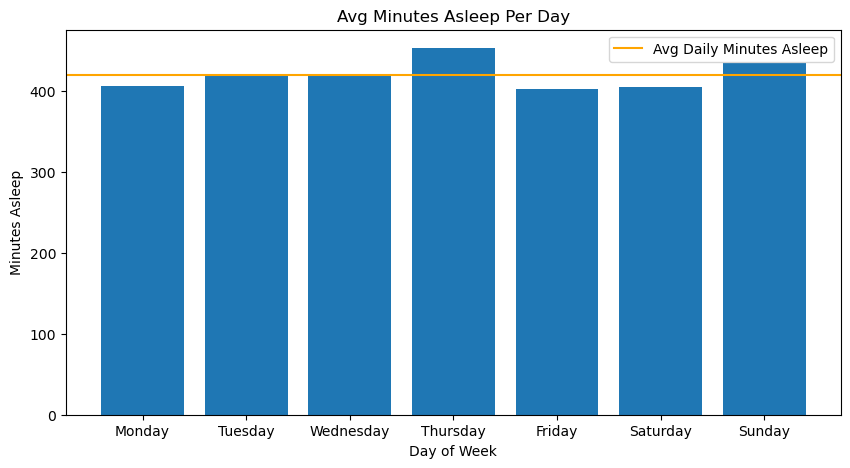

In [50]:
ig, ax=plt.subplots(1,1,figsize=(10,5))
day_grp=sleepday.groupby(['Day_of_Week'])
avg_daily_asleep_mins = day_grp['TotalMinutesAsleep'].mean()
avg_asleep_minutes = sleepday['TotalMinutesAsleep'].mean()

plt.bar(avg_daily_asleep_mins.index, avg_daily_asleep_mins)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(avg_daily_asleep_mins.mean(), color= 'orange', label='Avg Daily Minutes Asleep')
ax.set_ylabel('Minutes Asleep')
ax.set_xlabel('Day of Week')
ax.set_title('Avg Minutes Asleep Per Day')

plt.legend()
plt.show()

https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need
https://www.calm.com/blog/oversleeping-tips#:~:text=Oversleeping%20varies%20by%20age%20and,check%20in%20with%20your%20doc.
 
From this two resources, we came up with the following quantity of sleep categories:

1)Deprieved: <7 hours (<420 minutes)

2)Normal: 7-9 hours(420-540 minutes)

3)Excessive: 9< hours(540 minutes)

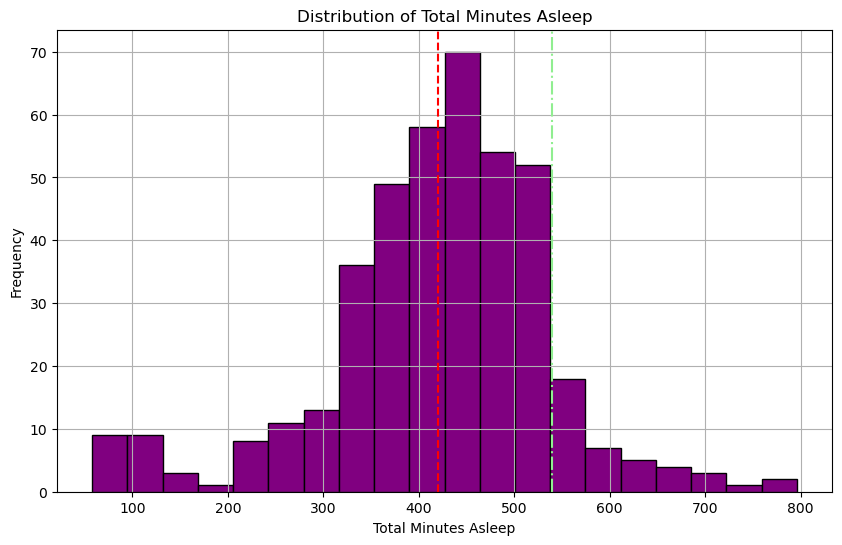

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(sleepday['TotalMinutesAsleep'], bins=20, color='purple', edgecolor='black')

plt.axvline(x=420, color='red', linestyle='--', label='X = 420')
plt.axvline(x=540, color='lightgreen', linestyle='-.', label='X = 540')

plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

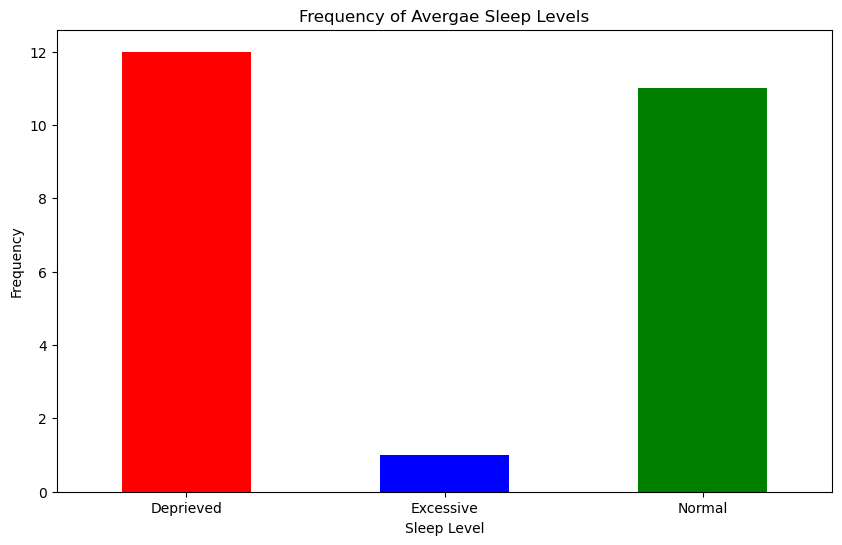

In [52]:
#group by Id and compute average


id_grp_sleep = sleepday.groupby(['Id'])
id_avg_sleep = id_grp_sleep['TotalMinutesAsleep'].mean().sort_values(ascending=False)

id_avg_sleep = id_avg_sleep.to_frame()
intervals = [(id_avg_sleep <=420), (id_avg_sleep > 420) & (id_avg_sleep < 540), (id_avg_sleep >=540)]
values_sleep = ['Deprieved', 'Normal', 'Excessive']
id_avg_sleep['Sleep_Level'] = np.select(intervals, values_sleep)
id_sleep_level = id_avg_sleep['Sleep_Level']
sleepday['Sleep_Level'] = [id_sleep_level[c] for c in sleepday['Id']]
#id_avg_sleep['Sleep_Level'] = pd.cut(id_avg_sleep['TotalMinutesAsleep'], bins=intervals, labels=values_sleep)

# Calculate the frequency of each Sleep_Level group
sleep_level_frequency = id_avg_sleep["Sleep_Level"].value_counts().sort_index()

# Plotting the frequency of each Sleep_Level group
plt.figure(figsize=(10, 6))
sleep_level_frequency.plot(kind='bar', color=['red', 'blue', 'green'])

plt.title('Frequency of Avergae Sleep Levels')
plt.xlabel('Sleep Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

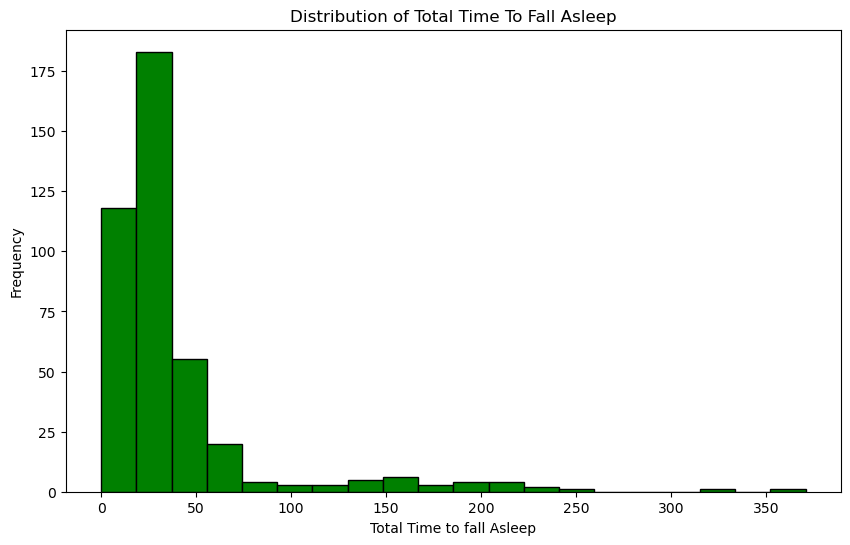

In [64]:
#frequencies of time reuqired to fall asleep
sleepday["TimeToFallAsleep"] = sleepday["TotalTimeInBed"]-sleepday["TotalMinutesAsleep"]

plt.figure(figsize=(10, 6))
plt.hist(sleepday['TimeToFallAsleep'], bins=20, color='green', edgecolor='black')


plt.title('Distribution of Total Time To Fall Asleep')
plt.xlabel('Total Time to fall Asleep')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

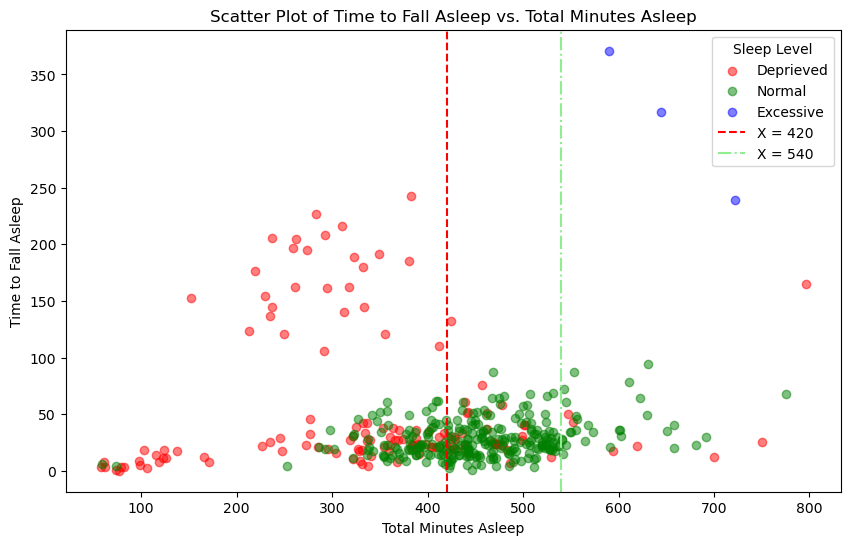

In [130]:
#time to fall asleep vs time slept
colors = {'Deprieved': 'red', 'Normal': 'green', 'Excessive': 'blue'}
plt.figure(figsize=(10, 6))

for sleep_level in values_sleep:
    subset = sleepday[sleepday['Sleep_Level'] == sleep_level]
    plt.scatter(subset['TotalMinutesAsleep'], subset['TimeToFallAsleep'],
                c=colors[sleep_level], label=sleep_level, alpha=0.5)

plt.axvline(x=420, color='red', linestyle='--', label='X = 420')
plt.axvline(x=540, color='lightgreen', linestyle='-.', label='X = 540')

plt.title('Scatter Plot of Time to Fall Asleep vs. Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Time to Fall Asleep')
plt.legend(title='Sleep Level')
plt.show()

In [99]:
groups_level = sleepday.groupby("Sleep_Level")["TimeToFallAsleep"]
print(groups_level.var())
print(groups_level.size())

Sleep_Level
Deprieved    3908.768410
Excessive    4404.000000
Normal        279.889268
Name: TimeToFallAsleep, dtype: float64
Sleep_Level
Deprieved    136
Excessive      3
Normal       274
Name: TimeToFallAsleep, dtype: int64


## ii)Analysis minute sleep day

## iii) Analysis sleep day merged with daily activity

In [113]:
def merge_dailyActivity_sleepday(dailyActivity: pd.DataFrame, sleepday: pd.DataFrame): 
   
    df = pd.merge(sleepday,dailyActivity,left_on = ["Id","SleepDay"],right_on = ["Id","ActivityDate"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    
    return df

In [112]:
activityAndSleepday = merge_dailyActivity_sleepday(dailyActivity,sleepday)
activityAndSleepday.isnull().sum()

Id                          0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
Date                        0
Day_of_Week_x               0
N_Day_of_Week_x             0
Sleep_Level                 0
TimeToFallAsleep            0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week_y               0
N_Day_of_Week_y             0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [115]:
activityAndSleepday.isna().sum()

Id                          0
SleepDay                    0
TotalSleepRecords           0
TotalMinutesAsleep          0
TotalTimeInBed              0
Date                        0
Day_of_Week_x               0
N_Day_of_Week_x             0
Sleep_Level                 0
TimeToFallAsleep            0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Day_of_Week_y               0
N_Day_of_Week_y             0
IntenseMinutes              0
Activity_Level              0
dtype: int64

In [119]:
#activityAndSleepday.duplicates()acti
activityAndSleepday.duplicated().sum()

3

In [127]:
activityAndSleepday1 = activityAndSleepday.drop_duplicates()
activityAndSleepday1.duplicated().sum()

0

In [128]:
activityAndSleepday1.shape

(410, 28)

In [129]:
activityAndSleepday1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   SleepDay                  410 non-null    datetime64[ns]
 2   TotalSleepRecords         410 non-null    int64         
 3   TotalMinutesAsleep        410 non-null    int64         
 4   TotalTimeInBed            410 non-null    int64         
 5   Date                      410 non-null    object        
 6   Day_of_Week_x             410 non-null    object        
 7   N_Day_of_Week_x           410 non-null    int32         
 8   Sleep_Level               410 non-null    object        
 9   TimeToFallAsleep          410 non-null    int64         
 10  ActivityDate              410 non-null    datetime64[ns]
 11  TotalSteps                410 non-null    int64         
 12  TotalDistance             4

In [133]:
#activityAndSleepday1.corr()--- do correlations

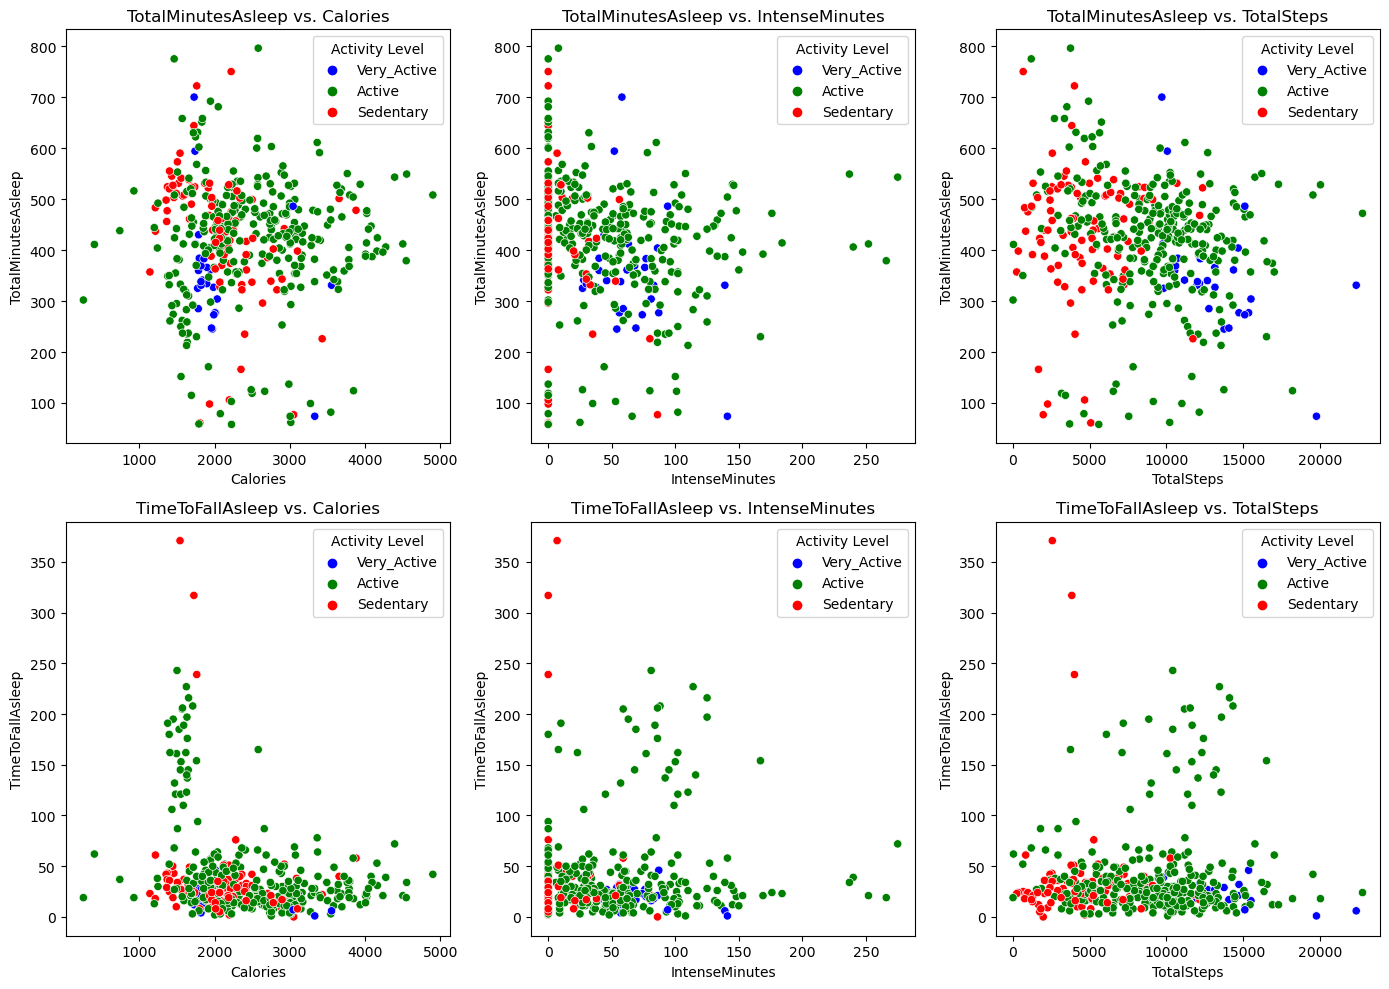

In [154]:
def plot_sleep_vs_variables(df: pd.DataFrame):
    
    variables = ["Calories", "IntenseMinutes", "TotalSteps"]
    sleep_factors = ["TotalMinutesAsleep", "TimeToFallAsleep"]
    
    # Define colors for each Activity_level
    colors = {'Sedentary': 'red', 'Active': 'green', 'Very_Active': 'blue'}    
    # Create a figure with subplots
    plt.figure(figsize=(14, 10))
    
    # Iterate over each sleep factor
    for j, sleep_factor in enumerate(sleep_factors, 1):
        # Iterate over each activity variable
        for i, activity in enumerate(variables, 1):
            plt.subplot(2, 3, (j-1)*3 + i)  # Calculate the subplot index
            # Scatter plot with Activity_level coloring
            sns.scatterplot(data=df, x=activity, y=sleep_factor, hue='Activity_Level', palette=colors)
            plt.title(f'{sleep_factor} vs. {activity}')
            plt.xlabel(activity)
            plt.ylabel(sleep_factor)
            plt.legend(title='Activity Level', loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    """
    variables = ["Calories", "IntenseMinutes", "TotalSteps"]
    colors = {'Sedentary': 'red', 'Active': 'green', 'Very_Active': 'blue'}

    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(variables, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TotalMinutesAsleep",hue='Activity_Level', palette=colors)
        plt.title(f'Time Slept vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time Slept (minutes)')
    
    plt.tight_layout()
    plt.show()
    """
    
plot_sleep_vs_variables(activityAndSleepday1)

/var/folders/b8/k1shsjk53yg7j39tjbpltkzc0000gn/T/ipykernel_16826/1220812055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyCalories['CalorieInterval'] = pd.cut(dailyCalories['Calories'], bins=bins, labels=labels, right=False)


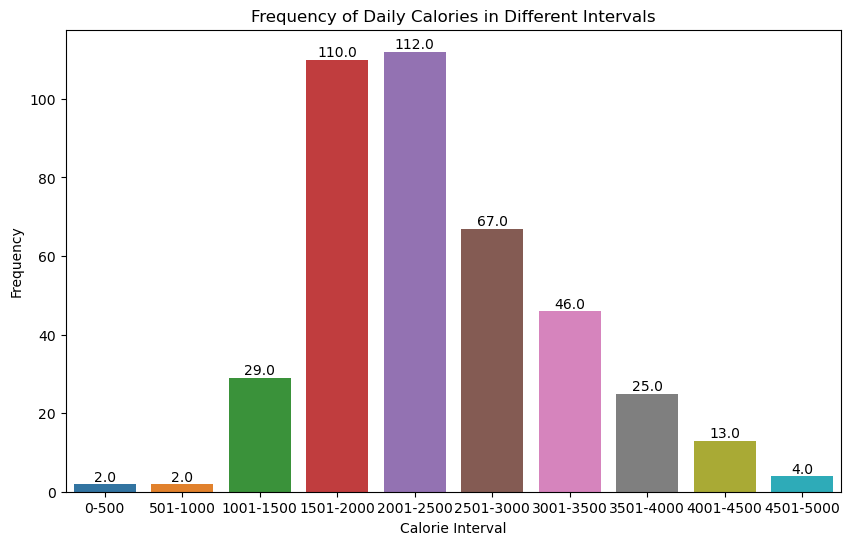

/var/folders/b8/k1shsjk53yg7j39tjbpltkzc0000gn/T/ipykernel_16826/1220812055.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CalorieInterval'] = pd.cut(df['Calories'], bins=bins, labels=labels, right=False)


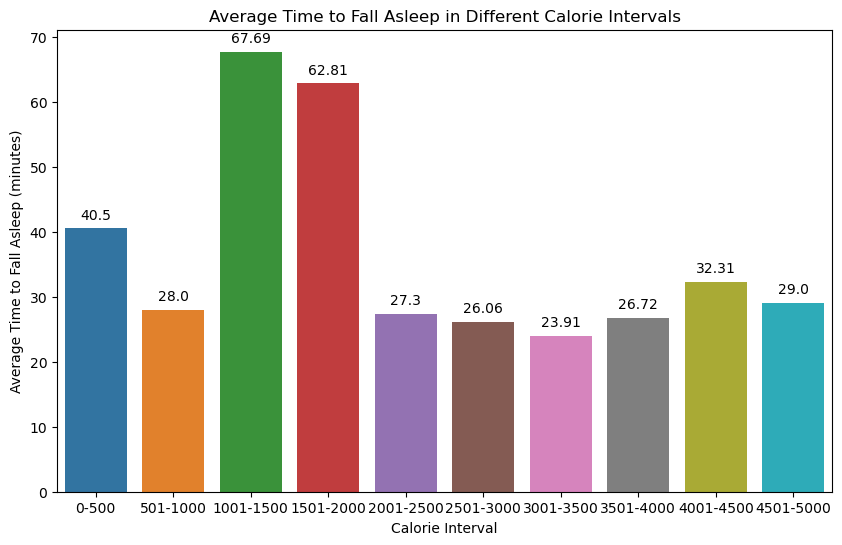

In [159]:
def plot_calorie_intervals_frequency(dailyCalories: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    dailyCalories['CalorieInterval'] = pd.cut(dailyCalories['Calories'], bins=bins, labels=labels, right=False)
    
    # Create a bar chart of the frequency of each interval
    plt.figure(figsize=(10, 6))
    bar_plot = sns.countplot(data=dailyCalories, x='CalorieInterval')
    plt.title('Frequency of Daily Calories in Different Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Frequency')

    # Add total frequency labels on top of each bar
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'{height}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 5), 
                          textcoords = 'offset points')

    plt.show()
    
def plot_calorie_intervals_avg_sleep(df: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    df['CalorieInterval'] = pd.cut(df['Calories'], bins=bins, labels=labels, right=False)
    
    # Calculate the average time to fall asleep for each interval
    avg_sleep = df.groupby('CalorieInterval')['TimeToFallAsleep'].mean().reset_index()
    
    # Create a bar chart of the average time to fall asleep
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_sleep, x='CalorieInterval', y='TimeToFallAsleep')
    plt.title('Average Time to Fall Asleep in Different Calorie Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Average Time to Fall Asleep (minutes)')
    
    # Add average time labels on top of each bar
    for i in range(len(avg_sleep)):
        plt.text(i, avg_sleep['TimeToFallAsleep'][i] + 1, round(avg_sleep['TimeToFallAsleep'][i], 2), ha = 'center', va = 'bottom')

    plt.show()
    
plot_calorie_intervals_frequency(activityAndSleepday1)
plot_calorie_intervals_avg_sleep(activityAndSleepday1)

Means of each variable for each of the 33 id´s. If return changed to df_means.describe(), we can see the mean for all the 33 users together.

In [31]:
def proportion_of_active_distance(df: pd.DataFrame):
    #count distinct Id´s
    #for each Id, calculate average veryActiveMinutes,reairActiveMinutes,LightlyActive
    #https://stackoverflow.com/questions/73390091/pandas-calculate-the-average-of-the-same-data
    uniqueIds = df.Id.unique()
    df_new = df.drop("ActivityDate",axis="columns")
    
    df_means = df_new.groupby(["Id"]).mean().reset_index()
    #for i in uniqueIds:
        
    return df_means.head()

proportion_of_active_distance(dailyActivity)


    
#get lowest 25% quantile and top 75%, look at how much time they slept and time required to fall asleep
#day of the week which people sleep more

TypeError: Could not convert TuesdayWednesdayThursdayFridaySaturdaySundayMondayTuesdayWednesdayThursdayFridaySaturdaySundayMondayTuesdayWednesdayThursdayFridaySaturdaySundayMondayTuesdayWednesdayThursdayFridaySaturdaySundayMondayTuesdayWednesdayThursday to numeric

-Frequency of minute activity levels 
-Proportion of average minute dedication to each intensity level
-Proportion of average minute dedication of the users that sleep most
-Proportion of average minute dedication of the users that fall asleep faster

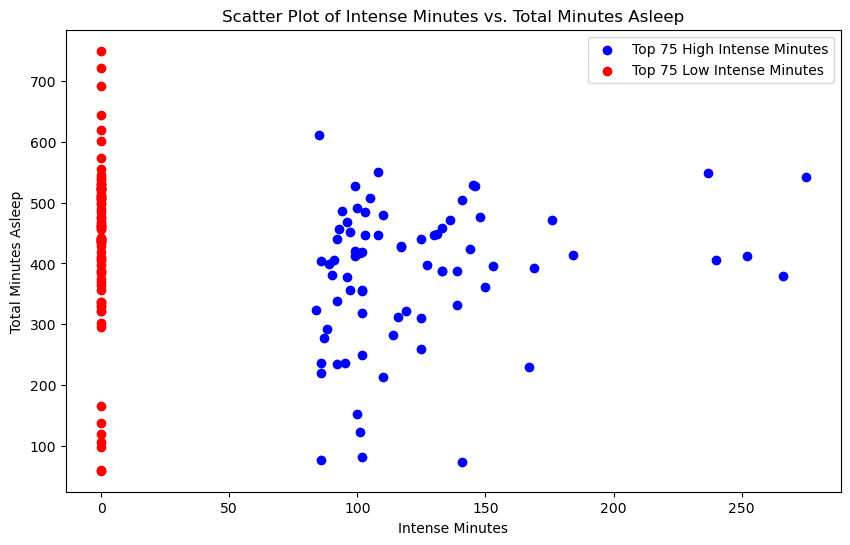

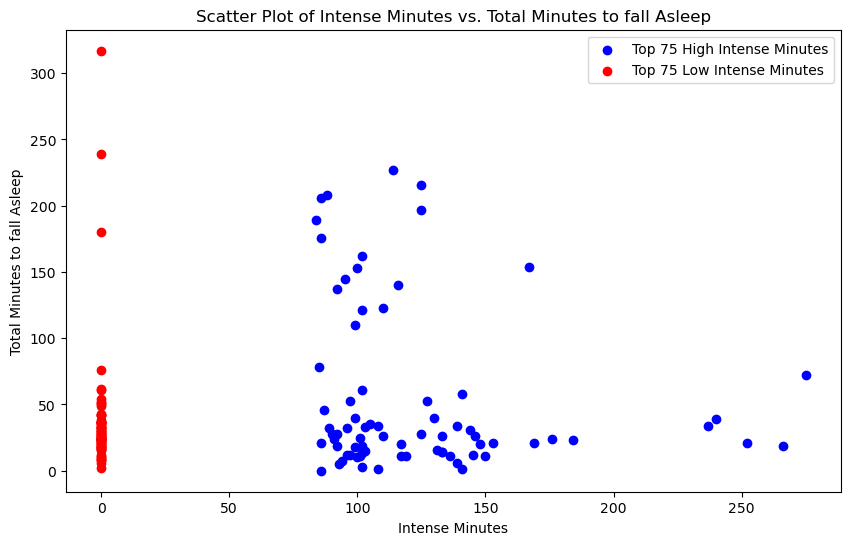

In [30]:
#top 25% best and worst of very+fairly minutes, compare time slept and time required to sleep?
def top_high_low_intenseminutes(dailyActivity: pd.DataFrame, sleepday: pd.DataFrame): 
    #https://stackoverflow.com/questions/58272872/pandas-top-n-values-in-each-group
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyActivity,left_on = ["Id","Date"],right_on = ["Id","ActivityDate"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    df["IntenseMinutes"] = df["VeryActiveMinutes"]+df["FairlyActiveMinutes"]
    top75= df.groupby("Id").IntenseMinutes.nlargest(75).reset_index()
    top75high = df.loc[top75['level_1']].nlargest(75, 'IntenseMinutes')
    top75low = df.loc[top75['level_1']].nsmallest(75, 'IntenseMinutes')
    return top75high, top75low

top75high, top75low = top_high_low_intenseminutes(dailyActivity, sleepday)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top75high['IntenseMinutes'], top75high['TotalMinutesAsleep'], color='blue', label='Top 75 High Intense Minutes')
plt.scatter(top75low['IntenseMinutes'], top75low['TotalMinutesAsleep'], color='red', label='Top 75 Low Intense Minutes')
plt.xlabel('Intense Minutes')
plt.ylabel('Total Minutes Asleep')
plt.title('Scatter Plot of Intense Minutes vs. Total Minutes Asleep')
plt.legend()
plt.show()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top75high['IntenseMinutes'], top75high['TimeToFallAsleep'], color='blue', label='Top 75 High Intense Minutes')
plt.scatter(top75low['IntenseMinutes'], top75low['TimeToFallAsleep'], color='red', label='Top 75 Low Intense Minutes')
plt.xlabel('Intense Minutes')
plt.ylabel('Total Minutes to fall Asleep')
plt.title('Scatter Plot of Intense Minutes vs. Total Minutes to fall Asleep')
plt.legend()
plt.show()

#def top_high_low_intenseminutes



See if TotalSteps affects the time to fall asleep ad time slept

## Daily Activity vs time slept and time to fall asleep

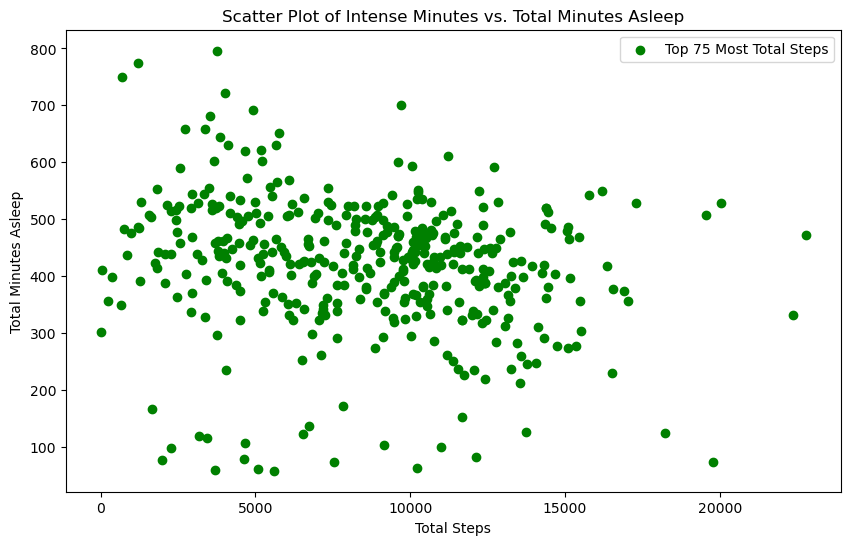

In [38]:
def merge_dailyActivity_sleepday(dailyActivity: pd.DataFrame, sleepday: pd.DataFrame): 
    #https://stackoverflow.com/questions/58272872/pandas-top-n-values-in-each-group
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyActivity,left_on = ["Id","Date"],right_on = ["Id","ActivityDate"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    
    return df


dfActivitySleep = merge_dailyActivity_sleepday(dailyActivity, sleepday)

plt.figure(figsize=(10, 6))
plt.scatter(dfActivitySleep['TotalSteps'], dfActivitySleep['TotalMinutesAsleep'], color='green')
plt.xlabel('Total Steps')
plt.ylabel('Total Minutes Asleep')
plt.title('Scatter Plot of Intense Minutes vs. Total Minutes Asleep')
plt.legend()
plt.show()

In [29]:
#merge sleep day and daily intensities
def merge_dailyIntensities_sleepDay(dailyIntensities: pd.DataFrame, sleepday: pd.DataFrame): 
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyIntensities,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

def plot_time_to_fall_asleep_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TimeToFallAsleep")
        plt.title(f'Time to Fall Asleep vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.tight_layout()
    plt.show()
    
def plot_time_slept_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TotalMinutesAsleep",color=["red"])
        plt.title(f'Time Slept vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time Slept (minutes)')
    
    plt.tight_layout()
    plt.show()

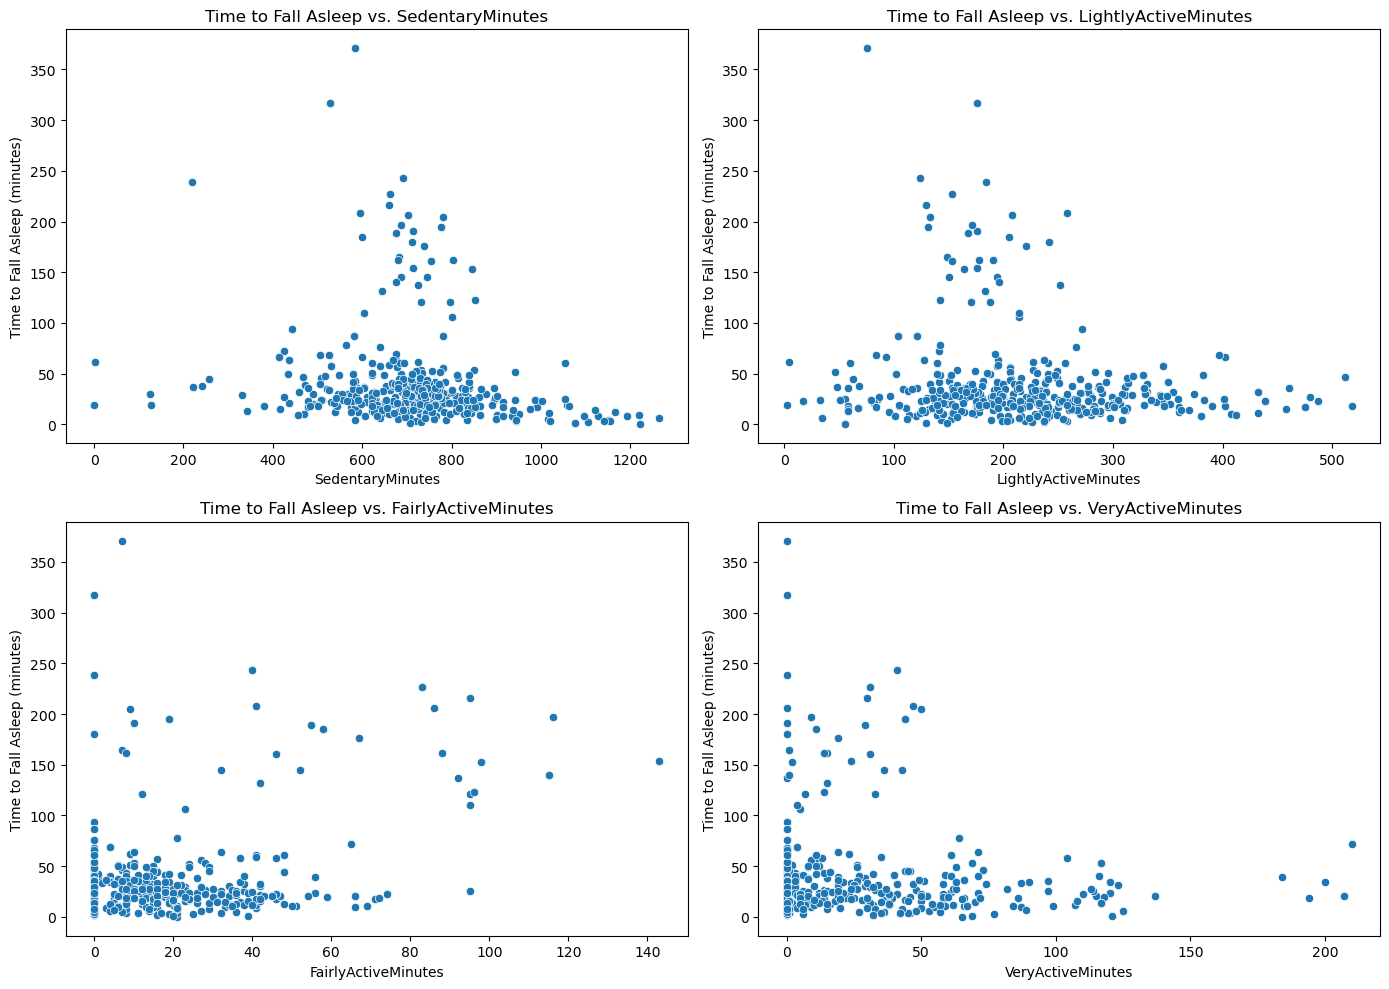

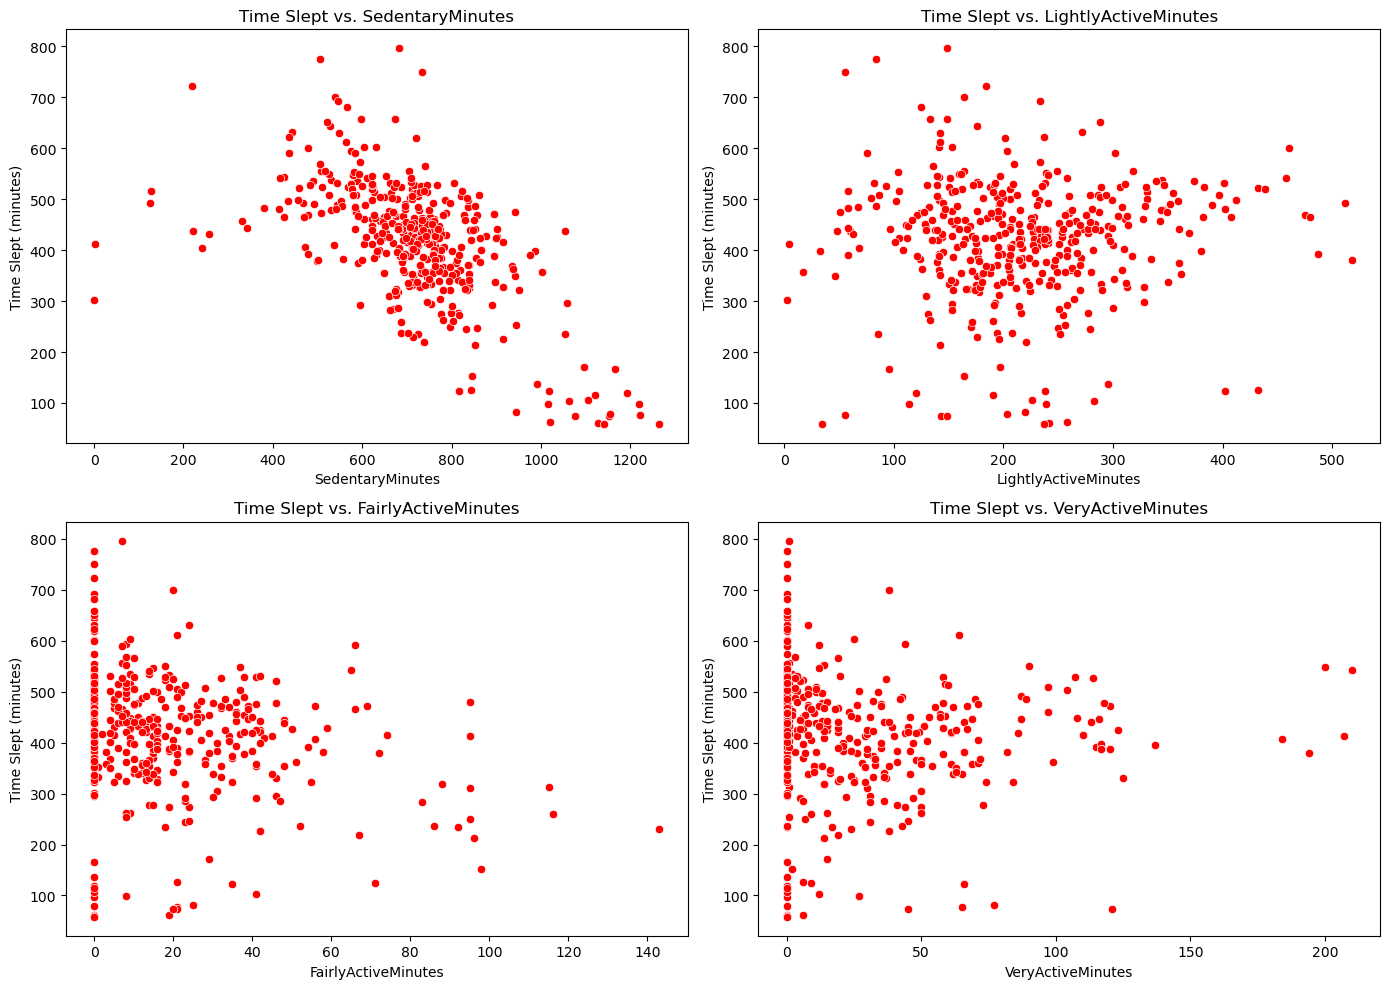

In [20]:
b=merge_dailyIntensities_sleepDay(dailyIntensities, sleepday)

plot_time_to_fall_asleep_vs_activity_minutes(b)
plot_time_slept_vs_activity_minutes(b)

## iii) BMI

In [14]:
def merge_bmi_sleepDay(weightLog: pd.DataFrame, sleepday: pd.DataFrame):
    weightLog["Date1"] = weightLog["Date"].str[0:9]
    sleepday["Date1"] = sleepday["SleepDay"].str[0:9]
    df = pd.merge(sleepday,weightLog,left_on = ["Id","Date1"],right_on = ["Id","Date1"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

def plot_time_to_sleep_vs_bmi(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='BMI', y='TimeToFallAsleep')
    plt.title('Time to Fall Asleep vs. BMI')
    plt.xlabel('BMI')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()


In [15]:
c = merge_dailyCal_sleepDay(weightLog,sleepday)
plot_time_to_sleep_vs_bmi(c)

KeyError: 'ActivityDay'

In [13]:
#find top 15 persons with highest BMI on average and look at their BMI, average activity, average Calorie
#do the same for everything but also for total time slept
#list bmi for their corresponding last record